https://medium.com/@thibalbo/coding-bayesian-ab-tests-in-python-e89356b3f4bd

In [4]:
import pymc3 as pm
import seaborn as sb
from theano import config
config.warn.round=False

%matplotlib inline

In [5]:
n = 1000
obs_v1 = 680
obs_v2 = 700

In [6]:
with pm.Model() as model: # context management
    # define priors
    prior_v1 = pm.Beta('prior_v1', alpha=2, beta=2)
    prior_v2 = pm.Beta('prior_v2', alpha=2, beta=2)

    # define likelihood
    like_v1 = pm.Binomial('like_v1', n=n, p=prior_v1, observed=obs_v1)
    like_v2 = pm.Binomial('like_v2', n=n, p=prior_v2, observed=obs_v2)
    
    # define metrics
    pm.Deterministic('difference', prior_v2 - prior_v1)
    pm.Deterministic('relation', (prior_v2/prior_v1) - 1)

    # inference
    trace = pm.sample(draws=50000, step=pm.Metropolis(), start=pm.find_MAP(), progressbar=True)

logp = -154.95, ||grad|| = 269.07: 100%|██████████| 7/7 [00:00<00:00, 769.27it/s]
Sequential sampling (2 chains in 1 job)
CompoundStep
>Metropolis: [prior_v2_logodds__]
>Metropolis: [prior_v1_logodds__]
100%|██████████| 50500/50500 [00:33<00:00, 1494.98it/s]
The number of effective samples is smaller than 10% for some parameters.


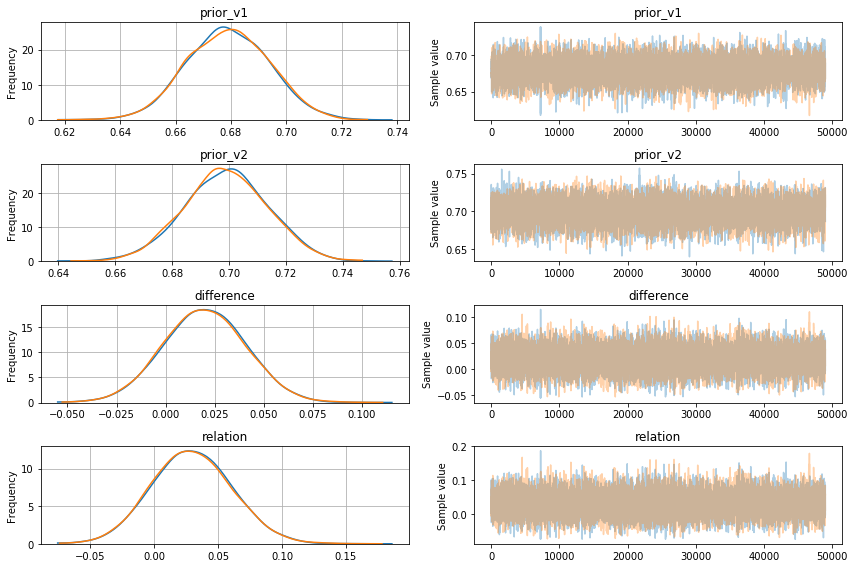

In [7]:
_ = pm.traceplot(trace[1000:], grid=True)

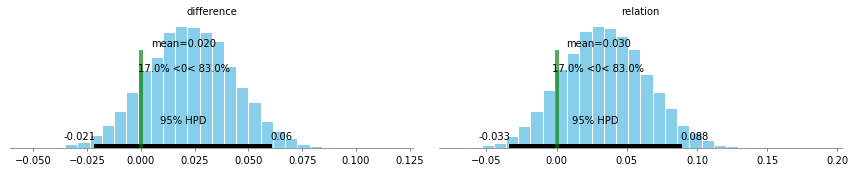

In [8]:
_ = pm.plot_posterior(trace[1000:], varnames=['difference', 'relation'], 
                      ref_val=0, color='#87ceeb')